# Homework 5
Due: Thurs 4/4/24 at 6 pm CT \
Submit as .ipynb file

# Scoring
- (1) = 40 points
    - (a): 10 points
    - (b): 10 points
    - (c): 10 points
    - (d): 10 points
- (2) = 20 points
    - (a): 10 points
    - (b): 10 points
- (3) = 20 points
- (4) = 20 points

# (1) Exploring catalyst data through Unsupervised Learning

Here, we are going to look at a large set of catalysis data. This data is collected over 10 years of research. 

The particular reaction we are interested in is the water gas shift reaction: https://en.wikipedia.org/wiki/Water%E2%80%93gas_shift_reaction

Given by: CO + H2O = CO2 + H2

This reaction is highly studied because it is able to both convert carbon monoxide to CO2 and create hydrogen.

The dataset consists of over 2000 measured experiments, with 27 descriptors for each experiment. The descriptors help us understand quantum features of the catalyst like the binding energy of carbon. It also characterizes molecular features, such as molecular weight and electronegativity as well as experimental conditions such as temperature. 

In [1]:
#load in our packages

import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


plt.style.use('../../modules/files/plot_style.mplstyle')

In [2]:
# Load data from text file

ftxt = os.path.join('..', '..', 'modules', 'data', 'water_gas_shift', 'data_table.txt')

df = pd.read_csv(ftxt)

df.head()

,BE_C,loading_base,MW_Prom,FirstIE,CovalentRadius,ChargeLow,ChargeHigh,Z_IonicRad,Electronegativity,Redox_Prom,...,CalcT_C,CalcT_time,T_K,H2Vol_,COVol_,H2OVol_,CO2Vol_,TOS_min_,F_W,rate_for_adj_norm
0,-3.06,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,25,0.0,443.15,0.0,4.498,30.6,0.0,60.0,0.5,0.475074
1,-3.06,3.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,25,0.0,443.15,0.0,4.498,30.6,0.0,60.0,0.5,0.065838
2,-3.06,5.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,25,0.0,443.15,0.0,4.498,30.6,0.0,60.0,0.5,-0.245681
3,-3.06,1.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,25,0.0,473.15,0.0,4.498,30.6,0.0,60.0,0.5,1.071996
4,-3.06,3.0,0.0,0.0,0.0,0,0,0.0,0.0,0.0,...,25,0.0,473.15,0.0,4.498,30.6,0.0,60.0,0.5,0.631008


In [3]:
# Let's ignore the last 17 columns of the dataframe and consider the rest of the columns features

features = list(df)[:-17]
df = df[features]

In [4]:
# Create our initial feature matrix

X_initial = df.values

print(X_initial.shape)

(2129, 18)


# (1a) Principal Component Analysis (unscaled features)

__Guidelines:__ 
- Create a single scatter plot with labeled axes.
- Provide a plot of the first two principal components for the unscaled data (`X_initial`) using `sklearn.decomposition.PCA`

**Scoring**:
- +4 points for attempting
- +6 points for meeting all guidelines

Text(0, 0.5, 'Principal Component 2')

<Figure size 400x200 with 0 Axes>

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


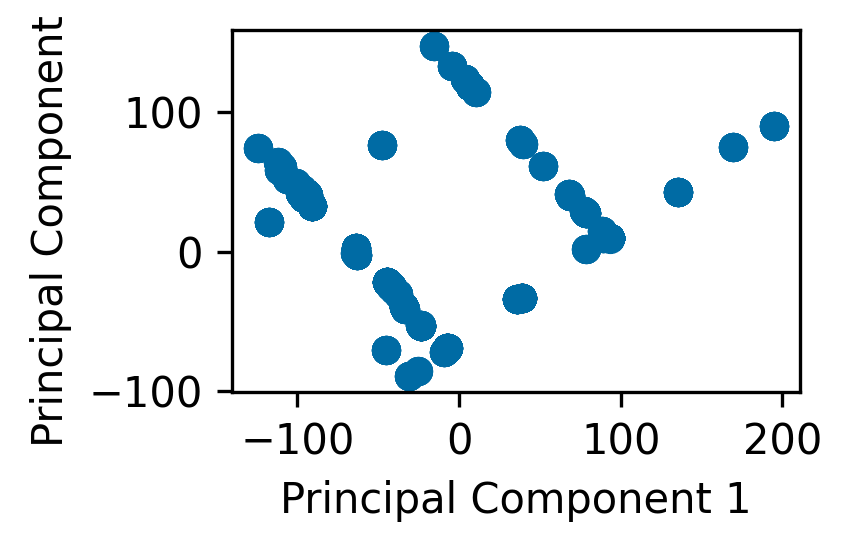

In [5]:
####### your code here
from sklearn.decomposition import PCA

pca = PCA()

X = pca.fit_transform(X_initial)

fig = plt.figure(dpi = 100)

plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# (1b) Principal Component Analysis (scaled features)

__Guidelines:__ 
- Scale your feature matrix, `X_initial` using `sklearn.preprocessing.MinMaxScaler` and call your scaled matrix, `X_scaled`
- Create a single scatter plot with labeled axes.
- Provide a plot of the first two principal components for the scaled data (`X_scaled`) using `sklearn.decomposition.PCA` 

**Scoring**:
- +4 points for attempting
- +6 points for meeting all guidelines

Text(0, 0.5, 'Principal Component 2')

<Figure size 400x200 with 0 Axes>

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


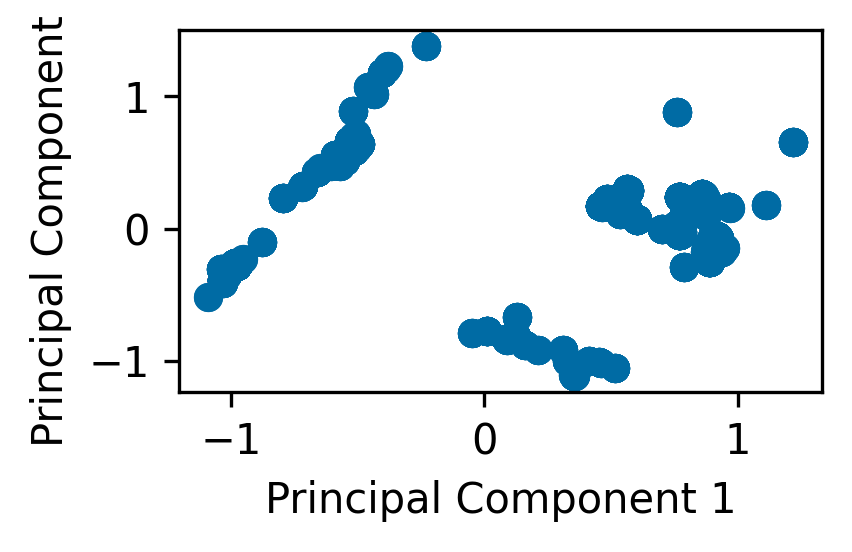

In [6]:
####### your code here
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_initial)
pca = PCA()
X = pca.fit_transform(X_scaled)
fig = plt.figure(dpi = 100)

plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1])

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

# (1c) Why do the scaled and unscaled data PCA results look so different? 

**Guidelines**:
- Write 1-3 sentences of justification for your answer.

**Scoring**:
- +4 points for attempting
- +6 points for satisfactory justification

## ***your answer here***:
- The scaled and unscaled data PCA results look different because PCA is highly sensitive to the scale of the features. When the features are on different scales, those with larger magnitudes dominate the variance and covariance calculations, leading to biased results. 
Scaling the data ensures that each feature contributes equally to the PCA process by bringing them to a common scale. This prevents any one feature from dominating the analysis and ensures that the PCA captures the underlying structure of the data more accurately.
Therefore, the differences between the scaled and unscaled PCA results can be attributed to the scaling process effectively standardizing the data and removing any bias caused by differences in feature magnitudes. As a result, the scaled PCA results provide a more accurate representation of the data's underlying structure compared to the unscaled PCA results.


# (1d) Understanding PC1 and PC2 in terms of original features
**Guidelines**:
- Use the PCs that result after scaling your features
- Which feature is most prominent in PC1? PC2?
- Plot a bar chart that compares the contribution of each feature to PC1 and PC2 
- Write 1-3 sentences explaining how you arrived at your answer

**Scoring**:
- +4 points for attempting
- +6 points for satisfactory answer

In [7]:
pca.components_[0]

array([-0.08687023, -0.02759633,  0.33530339,  0.27595499,  0.4421168 ,
       -0.04818057,  0.31664881,  0.2010121 ,  0.40713541, -0.3420517 ,
        0.04669815, -0.12127931, -0.21218748,  0.09429137,  0.05650431,
       -0.22118814, -0.07623594,  0.23056515])

In [8]:
pca.components_[1]

array([-0.17680378, -0.01116306, -0.2149773 , -0.08487704, -0.25555295,
       -0.12512072, -0.06824462, -0.0013672 , -0.09564085,  0.27551225,
       -0.05472812, -0.20093257, -0.32995825,  0.36438253,  0.16834932,
       -0.49398833,  0.03342408,  0.43130188])

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


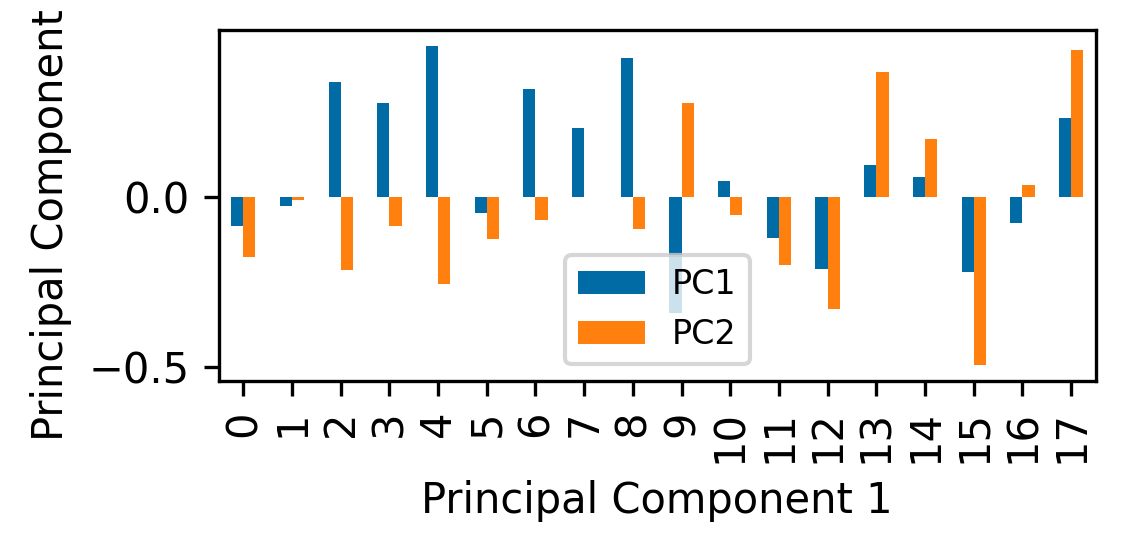

In [9]:
####### your code here
pca = PCA(n_components=2)

pca.fit(X_scaled)

PC1 = pca.components_[0]
PC2 = pca.components_[1]

pc_loadings = pd.DataFrame({'PC1': PC1, 'PC2': PC2}, index=range(0,18,1))

# Plot the bar chart
pc_loadings.plot(kind='bar')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

## **your answer here**
- Before plotting the bar chart, I analyze the components printed above. Component[0] corresponds to PC1, where the most prominent feature is the Covalent Radius, with a value of approximately 0.44. On the other hand, component[1] corresponds to PC2, where the most prominent feature is H2vol, with a value of roughly -0.49. These observations align with the information presented on the graph, confirming the relationship between the principal components and the features.

# (2a) Clustering Analysis

__Guidelines:__ 
- Use K-means clustering (`sklearn.cluster.KMeans`) with 5 clusters to identify clusters in the scaled feature matrix, `X_scaled`
- Overlay the clustering and PCA results by reproducing the figure you generated in **(1b)** but use a different color for each cluster you identified

__Hint:__ 
- `KMeans().labels_` may be useful

**Scoring**:
- +4 points for attempting
- +6 points for meeting all guidelines

<Figure size 400x200 with 0 Axes>

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


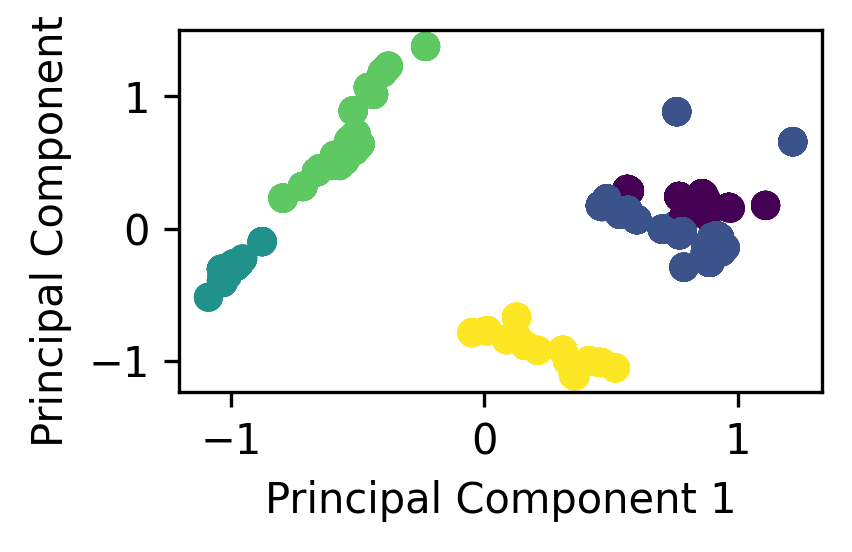

In [10]:
####### your code here
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5)

kmeans.fit(X_scaled)

# Predict the clusters for each data point
y_pred = kmeans.predict(X_scaled)

# Perform PCA
X = pca.fit_transform(X_scaled)
fig = plt.figure(dpi = 100)

plt.figure(figsize=(3, 2))
plt.scatter(X[:, 0], X[:, 1], c=y_pred)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# (2b) Identifying the best number of clusters

__Guidelines:__ 
- plot the sum of squares distance from each cluster center (`KMeans().inertia_`) as you change the total number of cluster from 1,2,...,8. 
- Label your axes. 
- Based on this plot, how many clusters seem appropriate (1-3 sentences)?

**Scoring**:
- +4 points for attempting
- +6 points for meeting all guidelines

Text(0, 0.5, 'Sum of Squared Distances to Cluster Center')

C:\Users\emman\anaconda3\envs\cems5802_24.0\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


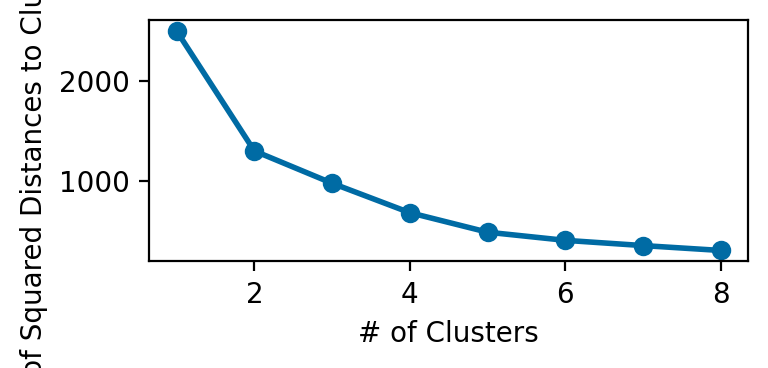

In [11]:
####### your code here
inertia = []

for i in range(8):
    
    # Create KMeans model object
    kmeans = KMeans(n_clusters=i+1)

    # Fit the model to the data
    kmeans.fit(X_scaled)
    
    #compute total sum of squared distances to means
    inertia.append(kmeans.inertia_)


plt.figure(dpi = 200)

plt.plot(np.arange(1,9,1),inertia,'o-')

plt.xlabel("# of Clusters")

plt.ylabel("Sum of Squared Distances to Cluster Center")

## ***your answer here***
- Four optimal number of clusters is seen at the point where the rate of decrease in inertia slows down abruptly, forming an "elbow" shape. Additionally, based on the plot overlaying the clustering and PCA results using five clusters, the data points appear to be reasonably separated into four distinct groups. Each cluster exhibits a clear separation from the others, suggesting that four clusters may be appropriate for capturing the underlying structure of the data.



# (3) Nonlinear Dimensionality Reduction

**Guidelines**:
- create a figure with 6 subplots (3 rows x 2 columns) that plots the second eigenvector vs the first eigenvector resulting from a nonlinear dimensionality reduction technique starting from the scaled feature matrix, `X_scaled`
- choose 3 different nonlinear dimensionality reduction techniques (also called "[manifold learning](https://scikit-learn.org/stable/modules/manifold.html)")
    - each row of your figure will use the same method
- within each row, vary a hyperparameter for the chosen dimensionality reduction technique in that row
    - the hyperparameter for your chosen method that affects number of neighbors might be a good one
    - the left plot should use a low value for your chosen hyperparameter
    - the right plot should use a high value
- the title of each subplot should indicate the dimensionality reduction technique and the hyperparameter (and value) being varied
- your choice of method and hyperparameters will yield different results -- no need to comment on / explain the results, but you should hopefully appreciate the sensitivity of these methods

**Hints**:
- a `figsize=(9,9)` might look nice
- suppress warnings with:
```python3
import warnings
warnings.filterwarnings('ignore')
```
- try taking converting a `sklearn` model to a `str` (might be useful for the title)

**Scoring**:
- +5 points for attempting
- +15 points for meeting all guidelines

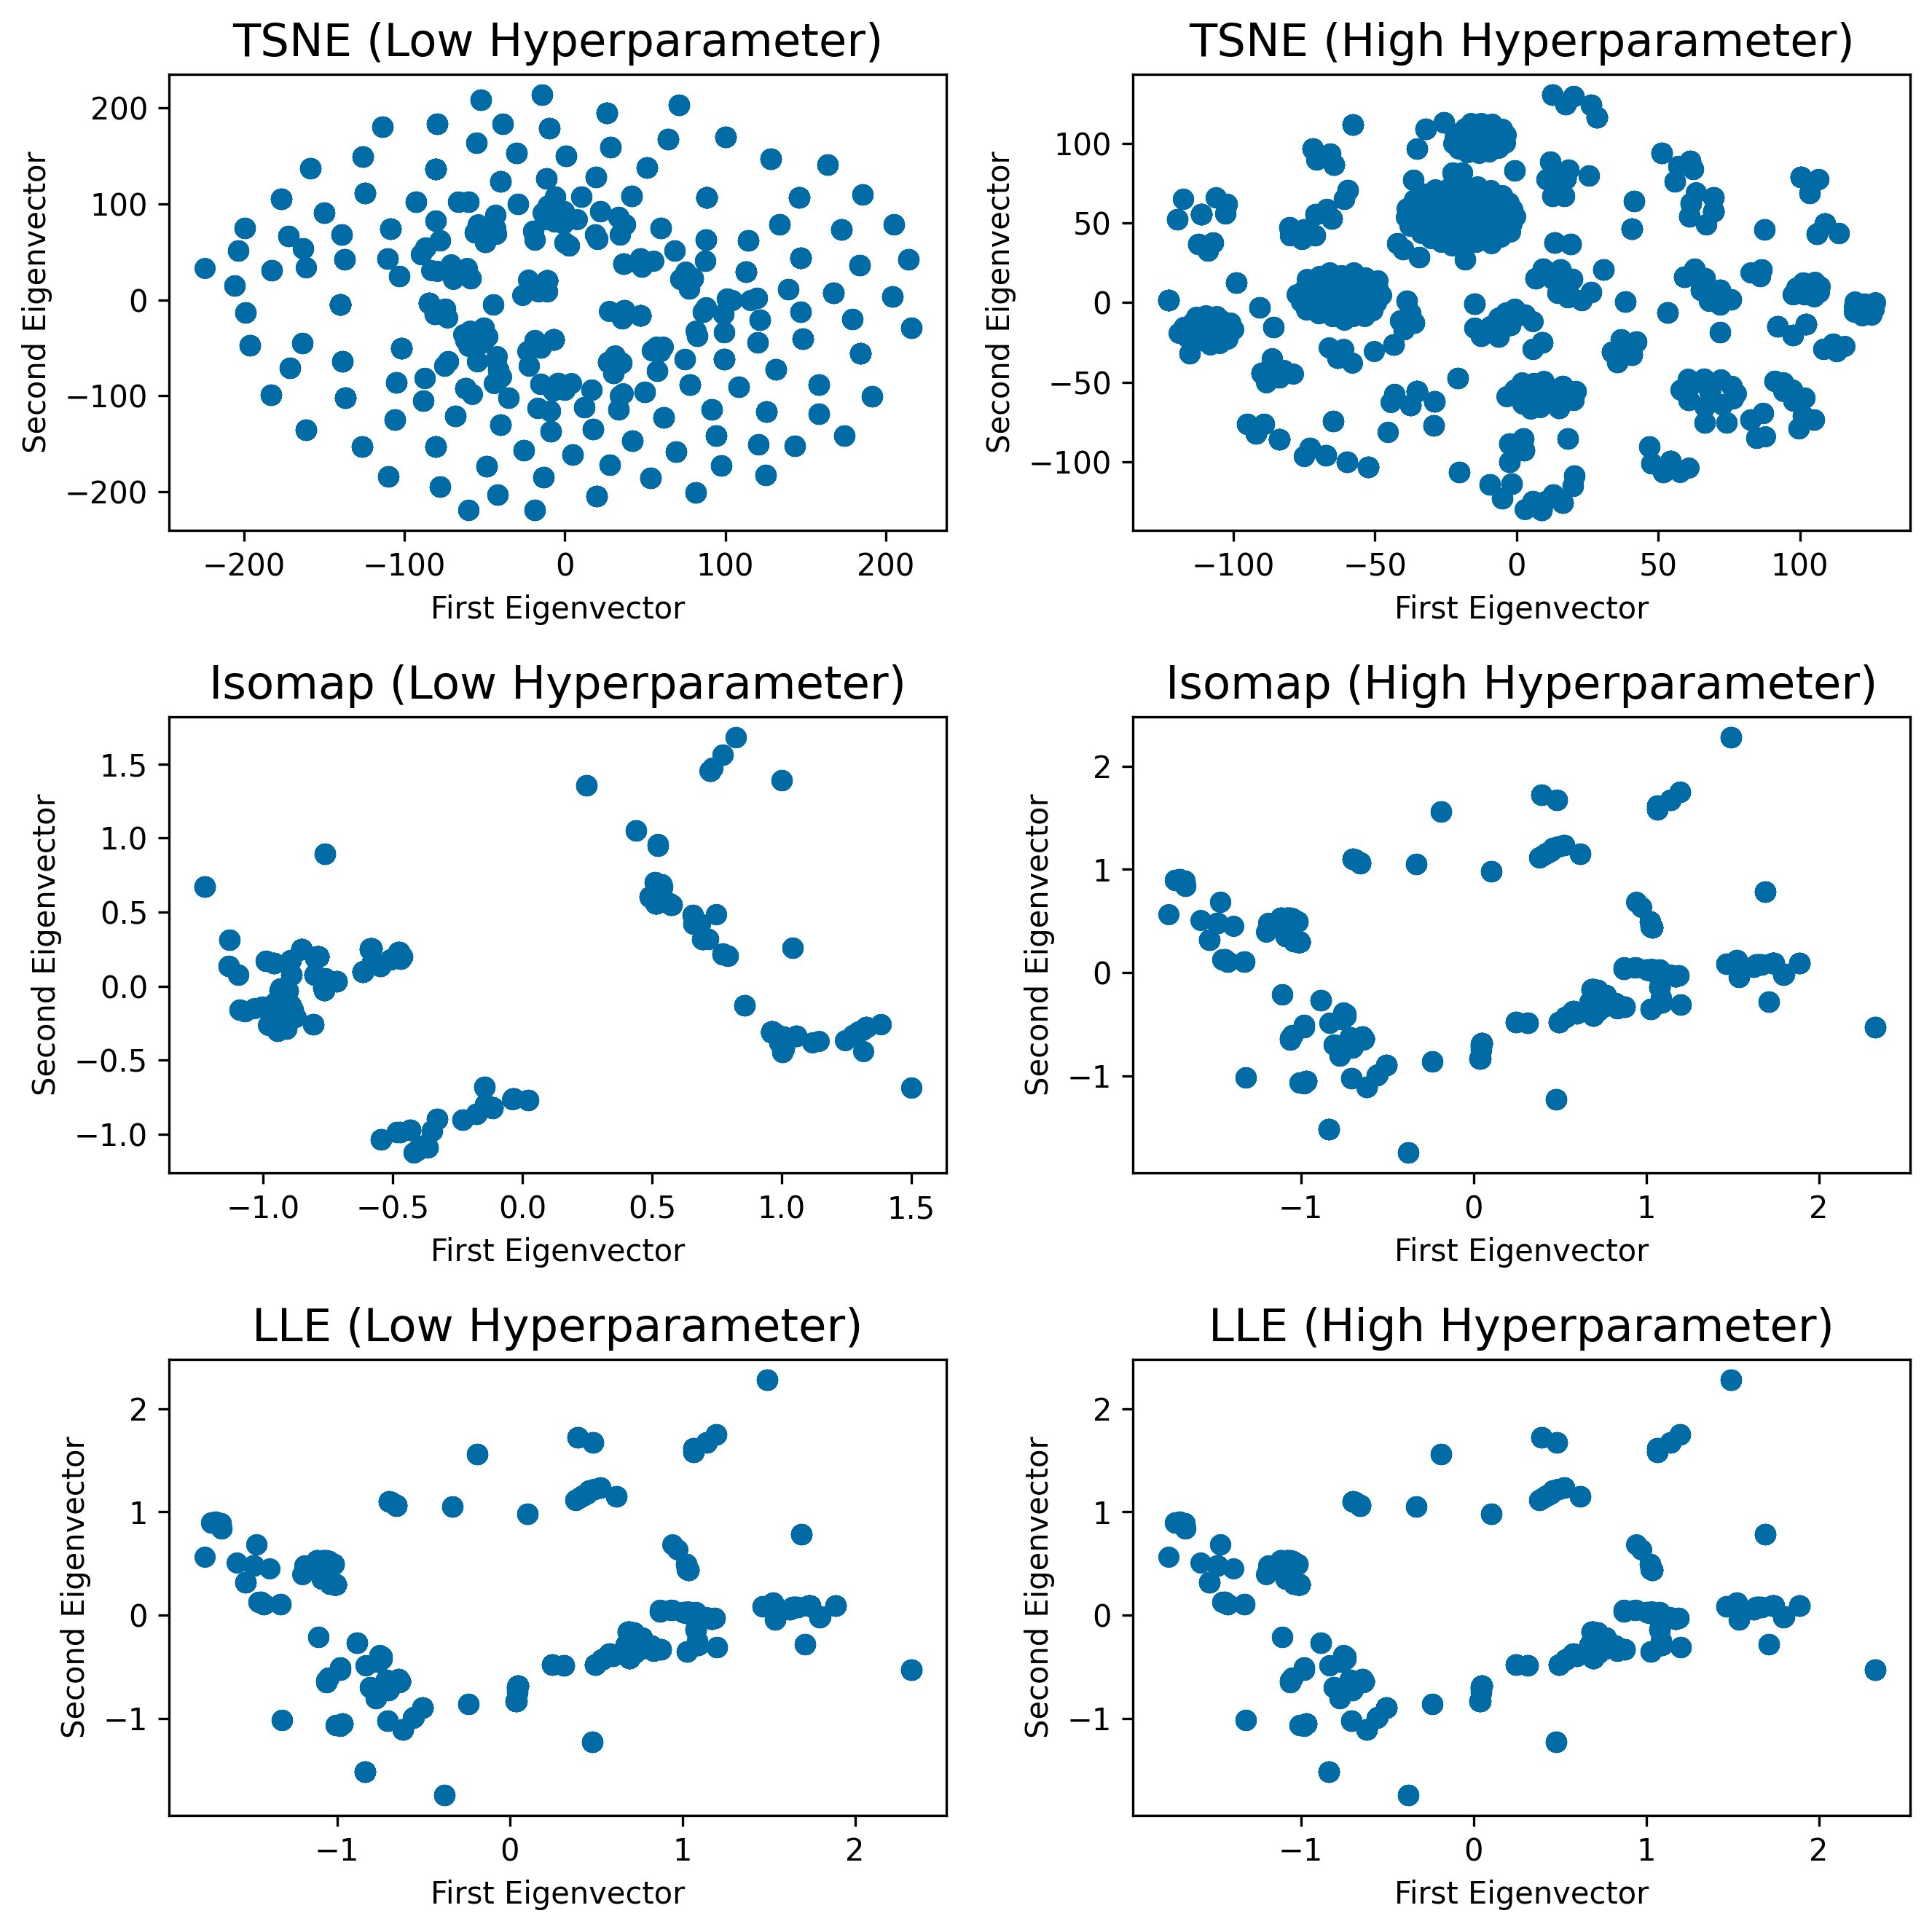

In [19]:
####### your code here
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding
import warnings

# Suppress warnings
warnings.filterwarnings('ignore')

# Define hyperparameters for each method
tsne_perplexity_low = 5
tsne_perplexity_high = 50
isomap_neighbors_low = 5
isomap_neighbors_high = 30
lle_neighbors_low = 5
lle_neighbors_high = 30

# Initialize subplots
fig, axes = plt.subplots(3, 2, figsize=(9, 9))

# Nonlinear dimensionality reduction techniques
methods = [(TSNE, 'TSNE'), (Isomap, 'Isomap'), (LocallyLinearEmbedding, 'LLE')]

# Loop through each row and method
for i, (method, method_name) in enumerate(methods):
    # Low hyperparameter
    ax = axes[i, 0]
    if method_name == 'TSNE':
        model = method(n_components=2, perplexity=tsne_perplexity_low)
    elif method_name == 'Isomap':
        model = method(n_components=2, n_neighbors=isomap_neighbors_low)
    elif method_name == 'LocallyLinearEmbedding':
        model = method(n_components=2, n_neighbors=lle_neighbors_low)
    reduced_data_low = model.fit_transform(X_scaled)
    ax.scatter(reduced_data_low[:, 0], reduced_data_low[:, 1])
    ax.set_title(f'{method_name} (Low Hyperparameter)')
    ax.set_xlabel('First Eigenvector')
    ax.set_ylabel('Second Eigenvector')
    
    # High hyperparameter
    ax = axes[i, 1]
    if method_name == 'TSNE':
        model = method(n_components=2, perplexity=tsne_perplexity_high)
    elif method_name == 'Isomap':
        model = method(n_components=2, n_neighbors=isomap_neighbors_high)
    elif method_name == 'LocallyLinearEmbedding':
        model = method(n_components=2, n_neighbors=lle_neighbors_high)
    reduced_data_high = model.fit_transform(X_scaled)
    ax.scatter(reduced_data_high[:, 0], reduced_data_high[:, 1])
    ax.set_title(f'{method_name} (High Hyperparameter)')
    ax.set_xlabel('First Eigenvector')
    ax.set_ylabel('Second Eigenvector')

plt.tight_layout()
plt.show()

# (4) PCA in the materials science literature

**Guidelines:**
- choose one of these two papers:
  - [Unsupervised word embeddings capture latent knowledge from materials science literature, Nature, 571, pages95–98 (2019)](https://www.nature.com/articles/s41586-019-1335-8)
  - [Robust Training of Machine Learning Interatomic Potentials with Dimensionality Reduction and Stratified Sampling, arXiv:2307.13710 (2023)](https://arxiv.org/pdf/2307.13710.pdf)
- State which paper you read and the overall objective of the paper (1-2 sentences).
- Discuss your chosen paper's use of dimensionality reduction. Why did they use principal componenent analysis? (3-5 sentences)

**Scoring**:
- +5 points for attempting
- +15 points for meeting all guidelines

## **your answer here**
- I read the paper titled “Robust Training of Machine Learning Interatomic Potentials with Dimensionality Reduction and Stratified Sampling.”
The paperobjective wass to develop a robust training set selection approach called Dimensionality-Reduced Encoded Clusters with Stratified (DIRECT) sampling to improve the accuracy and robustness of machine learning interatomic potentials (MLIPs) used in materials simulations. The authors also demonstrated the use of MD simulations with the M3GNet universal potential to generate an initial large configuration space for DIRECT sampling, reducing the need for active learning (AL) cycles and the total number of DFT static calculations required for MLIP development



This study utilized dimensionality reduction to select a robust training set of structures for machine learning interatomic potentials (MLIPs) from a large and complex configuration space. Principal Component Analysis (PCA) is employed as the dimensionality reduction technique in this study. PCA is used to reduce the complexity of the feature space by identifying the most important features that contribute to variance in the data. By applying PCA to the normalized fixed-length features from the encoding step, this study selects the first m principal components that explain more variance than any single variable to represent the feature space. 
